In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#calling pandas, numpy, matplotlib libraries

In [137]:
from statsmodels.tsa.ar_model import AutoReg
#Import the AutoReg class so we can build an Autoregression (AR) time series model.

In [138]:
df = pd.read_csv('uspopulation.csv',index_col = 'DATE', parse_dates = True)
#To load the dataset, convert the DATE column into datetime format, and set it as the index for time series analysis.

In [139]:
df.index.freq = 'MS'
#To tell pandas that the data frequency is Monthly Start (MS) so forecasting models understand the time spacing.¶Why important?
#AR/ARIMA models need fixed frequency
#Helps in forecasting future dates correctly

In [140]:
df.head()
#To check if data loaded correctly and confirm the datetime index is properly set.

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


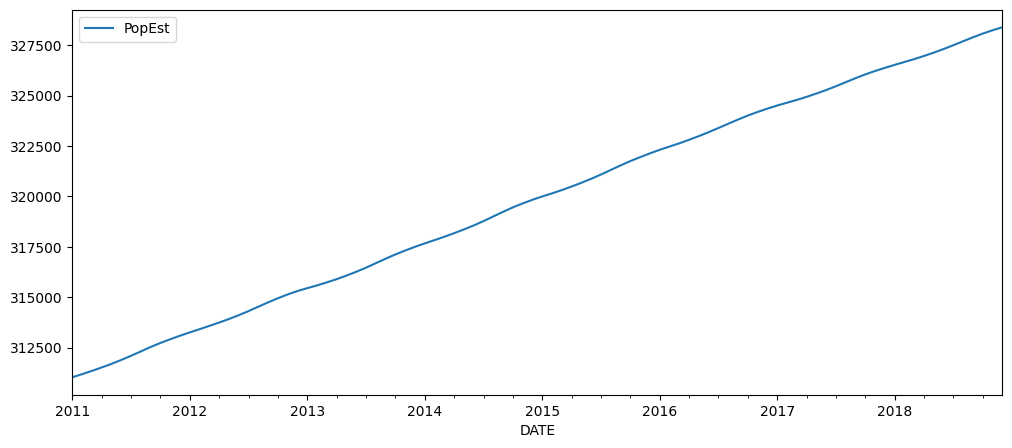

In [141]:
df.plot(figsize =(12,5))
plt.show()
#To visualize the population trend over time and check if it shows trend, seasonality, or stationarity.

In [142]:
len(df)
#To know how many total observations (rows) are present in the dataset.

96

In [143]:
96-12
#How many observation will after taking the train data, that will be called test data.

84

In [144]:
train = df.iloc[:84]
#To select the first 84 rows (past data) for model training.
#.iloc[:84] means:
#Start from row 0
#Stop before index 84

In [147]:
test = df.iloc[84:]
#To select the last 12 rows for testing the model’s forecasting accuracy.
#.iloc[84:] means:
#Start from row 84
#Take all remaining rows

In [152]:
import warnings
warnings.filterwarnings('ignore')
#To hide statistical warnings (like convergence warnings) so output looks clean

1#To create an Autoregressive model where current value depends on  previous value.
2#Mathematically:
3#Yt = c + ϕ1*Yt−1 + ϵt

4#lags=1 → AR(1) model, lags=2 AR(2) models and so on
5#Using only training data 

In [43]:
model1 = AutoReg(train['PopEst'], lags=1) 
#Taking lags=1, by using train data

In [153]:
AR1fit = model1.fit()
#To estimate the coefficients (c and φ₁) using training data.
#After this step, the model learns:
#*Intercept *Lag coefficient *Error variance

In [154]:
AR1fit.params
#const (c) → 284.91
#👉 This is the intercept (base level of the model).
#PopEst.L1 (φ₁) → 0.999686
#👉 This is the AR(1) lag coefficient (how strongly current value depends on previous value).
#Mathematically our model is:
#Yt=284.91+0.999686Yt−1

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [155]:
start = len(train)
#Define Forecast Start Point¶
#Training size = 84 Then forecasting starts at index 84.

In [57]:
start

84

In [156]:
end = len(train) + len(test) - 1
#👉 This calculates the last index of the forecast period.
#Why?
#Because indexing starts from 0.
#If:
#Train = 84
#Test = 12
#Then:
#84 + 12 - 1 = 95
#So forecast range is:
#84 → 95
#Which equals 12 future observations.

In [59]:
print(end)

95


In [60]:
AR1fit.predict(start=start, end = end)
#Will give predicted values, start from jan - 2018

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [157]:
test
#this is the original data

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [62]:
predictions1 = AR1fit.predict(start=start, end = end)

In [63]:
predictions1 = predictions1.rename('AR(1) Predictions')

In [64]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

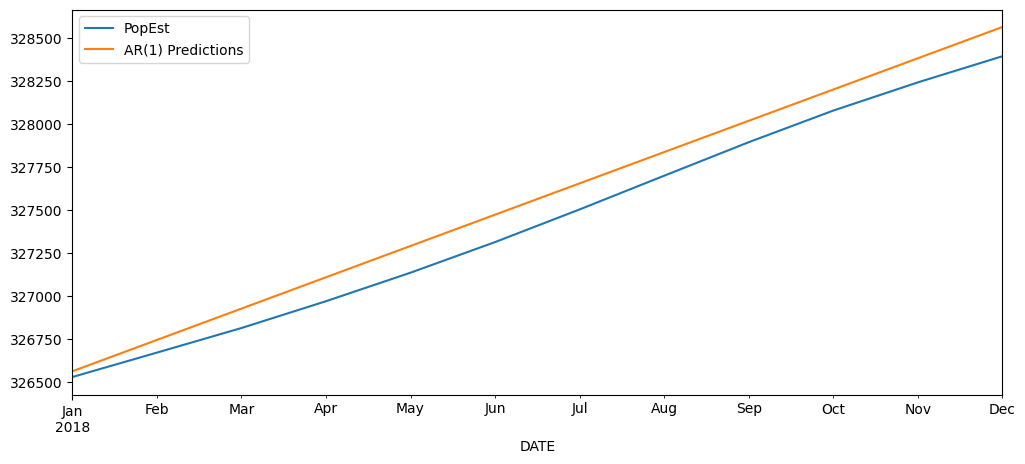

In [65]:
test.plot(figsize = (12,5))
predictions1.plot(legend=True)
plt.show()

In [72]:
model2 = AutoReg(train['PopEst'], lags=2) 

In [74]:
AR2fit = model2.fit()

In [75]:
AR2fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [76]:
predictions2 = AR2fit.predict(start=start, end = end)

In [77]:
predictions2 = predictions2.rename('AR(2) Predictions')

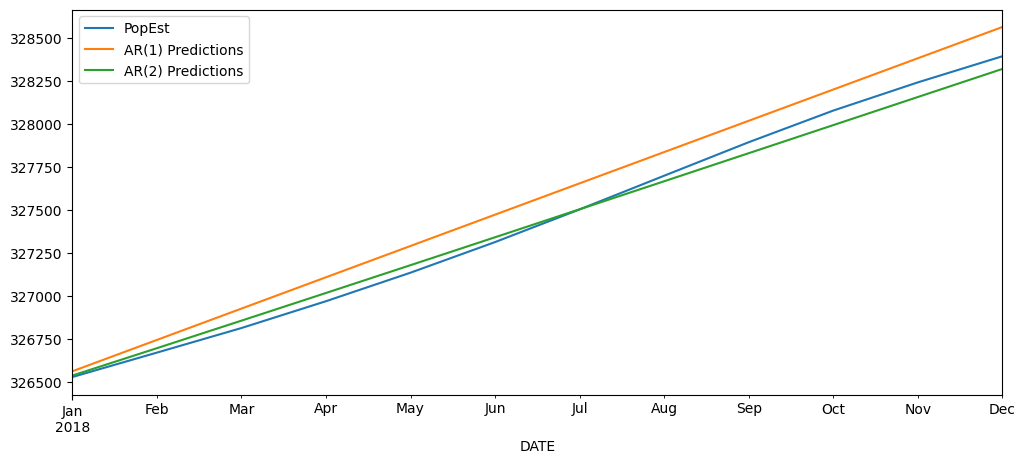

In [78]:
test.plot(figsize = (12,5))
predictions1.plot(legend=True)
predictions2.plot(legend=True)
plt.show()

In [158]:
model3 = AutoReg(train['PopEst'], lags=3) 
AR3fit = model3.fit()
AR3fit.params

const        91.742944
PopEst.L1     2.589781
PopEst.L2    -2.435443
PopEst.L3     0.845522
dtype: float64

In [159]:
predictions3 = AR3fit.predict(start=start, end = end)
predictions3 = predictions3.rename('AR(3) Predictions')

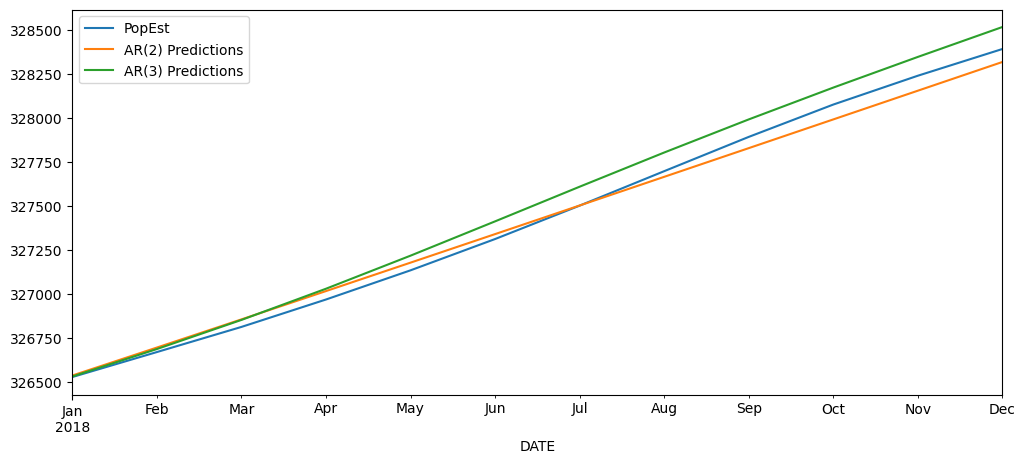

In [162]:
test.plot(figsize = (12,5))
predictions2.plot(legend=True)
predictions3.plot(legend=True)
plt.show()

In [165]:
model8 = AutoReg(train['PopEst'], lags=8) 
AR8fit = model8.fit()
AR8fit.params

const        82.309677
PopEst.L1     2.437997
PopEst.L2    -2.302100
PopEst.L3     1.565427
PopEst.L4    -1.431211
PopEst.L5     1.125022
PopEst.L6    -0.919494
PopEst.L7     0.963694
PopEst.L8    -0.439511
dtype: float64

In [166]:
predictions8 = AR8fit.predict(start=start, end = end)
predictions8 = predictions8.rename('AR(8) Predictions')

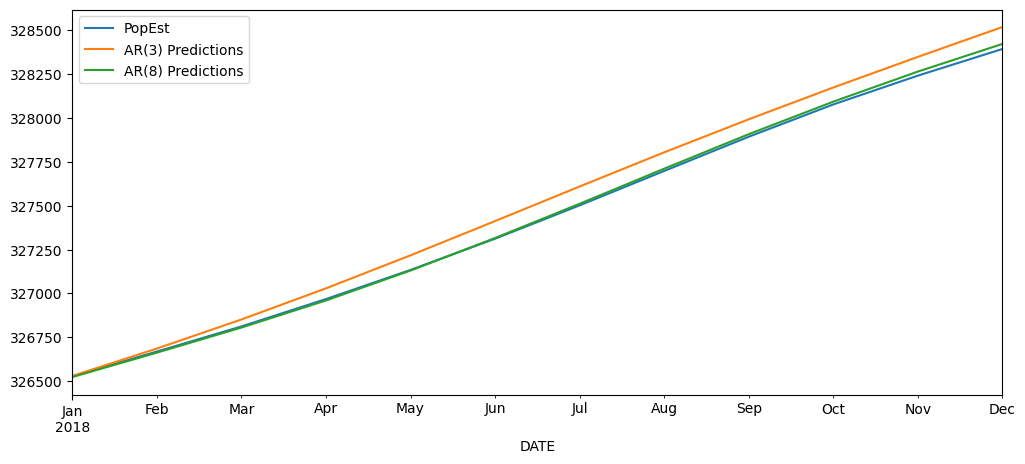

In [167]:
test.plot(figsize = (12,5))
predictions3.plot(legend=True)
predictions8.plot(legend=True)
plt.show()

In [171]:
model12 = AutoReg(train['PopEst'], lags=12) 
AR12fit = model12.fit()
AR8fit.params

const         108.483642
PopEst.L1       2.290496
PopEst.L2      -2.095235
PopEst.L3       1.441179
PopEst.L4      -1.297490
PopEst.L5       1.176928
PopEst.L6      -1.121290
PopEst.L7       1.229035
PopEst.L8      -1.019968
PopEst.L9       0.946070
PopEst.L10     -1.161728
PopEst.L11      1.132625
PopEst.L12     -0.520999
dtype: float64

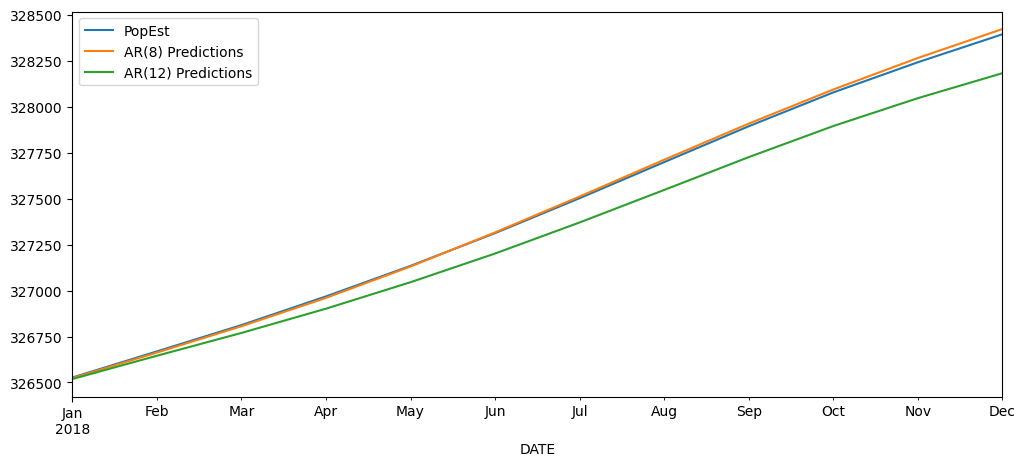

In [174]:
predictions12 = AR12fit.predict(start=start, end = end)
predictions12 = predictions12.rename('AR(12) Predictions')
test.plot(figsize = (12,5))
predictions8.plot(legend=True)
predictions12.plot(legend=True)
plt.show()

In [ ]:
# Best fit real graph with lags 8, 

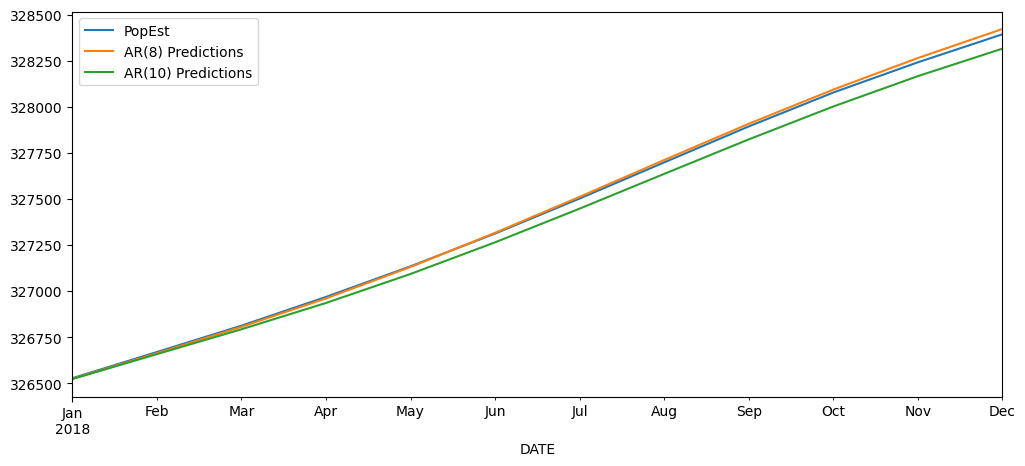

In [175]:
model10 = AutoReg(train['PopEst'], lags=10) 
AR10fit = model10.fit()
predictions10 = AR10fit.predict(start=start, end = end)
predictions10 = predictions10.rename('AR(10) Predictions')
test.plot(figsize = (12,5))
predictions8.plot(legend=True)
predictions10.plot(legend=True)
plt.show()

# Finally best fit, Lags 8.

In [176]:
predictions8

2018-01-01    326523.865561
2018-02-01    326662.772578
2018-03-01    326805.746889
2018-04-01    326960.064232
2018-05-01    327130.572949
2018-06-01    327315.962796
2018-07-01    327511.010113
2018-08-01    327710.938373
2018-09-01    327907.425555
2018-10-01    328092.870786
2018-11-01    328264.133683
2018-12-01    328421.667238
Freq: MS, Name: AR(8) Predictions, dtype: float64

In [177]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


# Now its time for Forecsting

In [197]:
model = AutoReg(df['PopEst'], lags=8)
ARfit = model.fit()

Forecast_values = ARfit.predict(start=len(df), end=len(df)+11).rename('Forecast')
Forecast_values = Forecast_values.rename("Forecast")

print(Forecast_values)

2019-01-01    328537.134656
2019-02-01    328675.917686
2019-03-01    328818.863482
2019-04-01    328973.057106
2019-05-01    329142.516106
2019-06-01    329325.479753
2019-07-01    329516.233833
2019-08-01    329709.938402
2019-09-01    329899.389640
2019-10-01    330077.704886
2019-11-01    330242.358917
2019-12-01    330394.543602
Freq: MS, Name: Forecast, dtype: float64


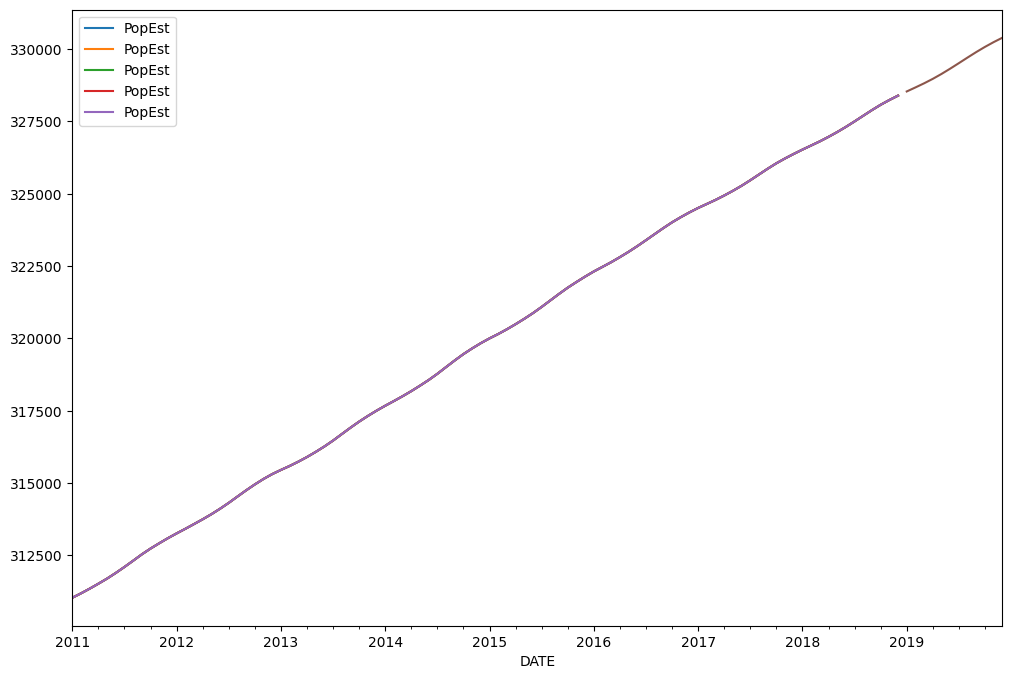

In [200]:
df['PopEst'].plot(figsize=(12,8),legend=True)
Forecast_values.plot()
plt.show()

# Forecasted Values

In [201]:
Forecast_values

2019-01-01    328537.134656
2019-02-01    328675.917686
2019-03-01    328818.863482
2019-04-01    328973.057106
2019-05-01    329142.516106
2019-06-01    329325.479753
2019-07-01    329516.233833
2019-08-01    329709.938402
2019-09-01    329899.389640
2019-10-01    330077.704886
2019-11-01    330242.358917
2019-12-01    330394.543602
Freq: MS, Name: Forecast, dtype: float64

# Now we can check accuracy in between all Models with different lags

# .....how can evaluate 
# .....
# 1️⃣ Information Criteria (AIC / BIC)
# 2️⃣ Forecast Accuracy (MAE / RMSE)
# 3️⃣ Statistical Significance (p-values)
# 4️⃣ Residual diagnostics (white noise check)

# NOT by raw coefficient size.

# ..... Wait for the next ...